# Chapter 3: Multiple regression in action


## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

In [2]:
%matplotlib inline 
# If you are using IPython, this will make the images available in the notebook

In [3]:
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

#1. CRIM: per capita crime rate by town 
#2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
#3. INDUS: proportion of non-retail business acres per town 
#4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
#5. NOX: nitric oxides concentration (parts per 10 million) 
#6. RM: average number of rooms per dwelling 
#7. AGE: proportion of owner-occupied units built prior to 1940 
#8. DIS: weighted distances to five Boston employment centres 
#9. RAD: index of accessibility to radial highways 
#10. TAX: full-value property-tax rate per $10,000 
#11. PTRATIO: pupil-teacher ratio by town 
#12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
#13. LSTAT: % lower status of the population 
#14. MEDV: Median value of owner-occupied homes in $1000's

In [4]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.ix[:,:-1]
y = dataset['target'].values
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Using multiple features

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
Xc.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the linear regression using 'response ~ predictor1 (+ predictor2 + ...)'
#linear_regression = smf.ols(formula = 'target ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS +\
#                                                 RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
#fitted_model# = linear_regression.fit(#)

In [9]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 26 Dec 2016   Prob (F-statistic):          6.95e-135
Time:                        10:11:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Correlation matrix

In [10]:
X = dataset.ix[:,:-1]
correlation_matrix = X.corr()
print (correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

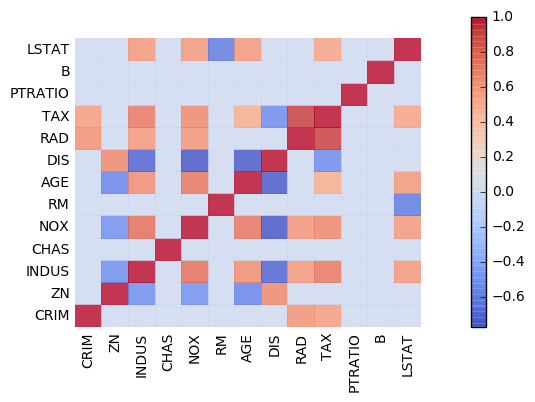

In [11]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

In [12]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [13]:
print (eigenvalues)

[ 6.12265476  1.43206335  1.24116299  0.85779892  0.83456618  0.65965056
  0.53901749  0.39654415  0.06351553  0.27743495  0.16916744  0.18616388
  0.22025981]


In [14]:
print (eigenvectors[:,8])

[-0.04552843  0.08089873  0.25126664 -0.03590431 -0.04389033 -0.04580522
  0.03870705  0.01828389  0.63337285 -0.72024335 -0.02350903  0.00485021
 -0.02477196]


In [15]:
print (variables[2], variables[8], variables[9])

INDUS RAD TAX


## Revisiting gradient descent

In [16]:
from sklearn.preprocessing import StandardScaler
observations = len(dataset)
variables = dataset.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
originanal_stds = standardization.std_
Xst = np.column_stack((Xst,np.ones(observations)))
y  = dataset['target'].values


/usr/local/lib/python3.4/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))                                   

These are our final standardized coefficients: -0.9204, 1.0810, 0.1430, 0.6822, -2.0601, 2.6706, 0.0211, -3.1044, 2.6588, -2.0759, -2.0622, 0.8566, -3.7487, 22.5328


In [18]:
unstandardized_betas = w[:-1] / originanal_stds
unstandardized_bias  = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])

print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

    bias:  36.4911
    CRIM:  -0.1072
      ZN:   0.0464
   INDUS:   0.0209
    CHAS:   2.6886
     NOX: -17.7958
      RM:   3.8048
     AGE:   0.0008
     DIS:  -1.4758
     RAD:   0.3057
     TAX:  -0.0123
 PTRATIO:  -0.9535
       B:   0.0094
   LSTAT:  -0.5255


## Figuring out importat features

### Working with standardized coefficients

In [19]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
# ATTENTION: Normalization = x -xmin/ xmax – xmin   Zero Score Standardization = x - xmean/ xstd

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

In [21]:
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

17.796 NOX
 3.805 RM
 2.689 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.107 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


In [22]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

 3.749 LSTAT
 3.104 DIS
 2.671 RM
 2.659 RAD
 2.076 TAX
 2.062 PTRATIO
 2.060 NOX
 1.081 ZN
 0.920 CRIM
 0.857 B
 0.682 CHAS
 0.143 INDUS
 0.021 AGE


### Using R squared

In [23]:
from sklearn.metrics import r2_score

linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y))

Baseline R2: 0.741


In [24]:
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) -r2_est(X.values[:,selection],y)) ,dataset.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.057 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 TAX
 0.006 CRIM
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


## Interaction model

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [26]:
def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

baseline = r2_est(X,y)
print ('Baseline R2: %0.3f' %  baseline)

Baseline R2: 0.741


In [27]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

In [28]:
for k,effect in \
    enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = variables[effect==1]
    increment = r2_est(Xi[:,list(range(0,main_effects)) \
                + [main_effects+k]],y) - baseline
    if increment > 0.01:
        print ('Adding interaction %8s *%8s R2: %5.3f' %  (termA, \
                termB, increment))

Adding interaction     CRIM *    CHAS R2: 0.011
Adding interaction     CRIM *      RM R2: 0.021
Adding interaction       ZN *      RM R2: 0.013
Adding interaction    INDUS *      RM R2: 0.038
Adding interaction    INDUS *     DIS R2: 0.013
Adding interaction      NOX *      RM R2: 0.027
Adding interaction       RM *     AGE R2: 0.024
Adding interaction       RM *     DIS R2: 0.018
Adding interaction       RM *     RAD R2: 0.049
Adding interaction       RM *     TAX R2: 0.054
Adding interaction       RM * PTRATIO R2: 0.041
Adding interaction       RM *       B R2: 0.020
Adding interaction       RM *   LSTAT R2: 0.064


/usr/local/lib/python3.4/dist-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  result = getitem(key)


In [29]:
Xi = X
Xi['interaction'] = X['RM']*X['LSTAT']
print ('R2 of a model with RM*LSTAT interaction: %0.3f' %  r2_est(Xi,y))

R2 of a model with RM*LSTAT interaction: 0.805


## Polynomial regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
create_highdegree = PolynomialFeatures(degree=7, interaction_only=False, include_bias=False)
linear_predictor = make_pipeline(linear_regression)
#quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


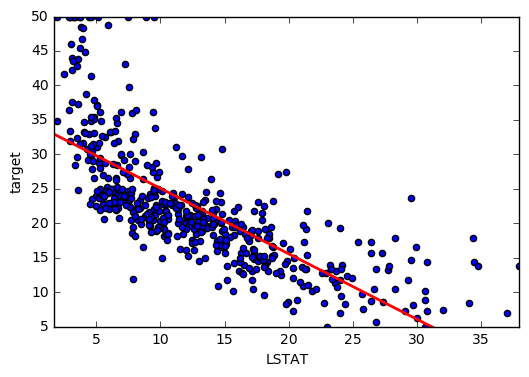

In [31]:
print(variables)
predictor = 'LSTAT'
x = dataset['LSTAT'].values.reshape((observations,1))
xt = np.arange(0,50,0.1).reshape((50/0.1,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

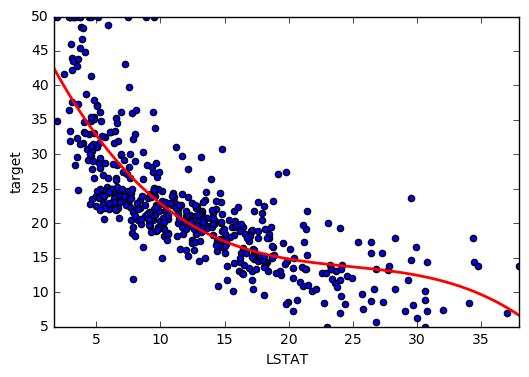

In [32]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), '-', color='red', linewidth=2)

In [33]:
for d in [1,2,3,5,15]:
    create_poly = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False)
    poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
    model = poly.fit(x,y)
    print ("R2 degree - %2i polynomial :%0.3f" %(d,r2_score(y,model.predict(x))))

R2 degree -  1 polynomial :0.544
R2 degree -  2 polynomial :0.641
R2 degree -  3 polynomial :0.658
R2 degree -  5 polynomial :0.682
R2 degree - 15 polynomial :0.695


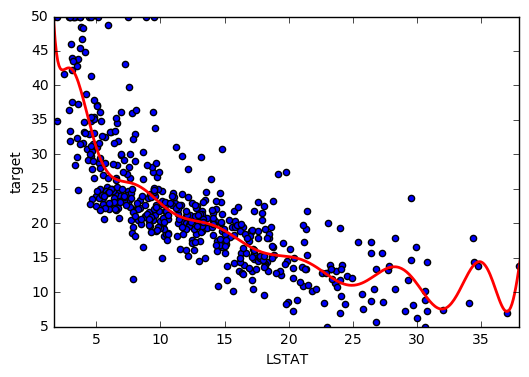

In [34]:
scatter = dataset.plot(kind='scatter', x=predictor, y='target', xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt, model.predict(xt), '-', color='red', linewidth=2)